In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
train_x=np.array([[0,0],[0,1],[1,0],[1,1]])
print(train_x)
train_y=np.array([[0],[1],[1],[0]])
print(train_y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]


<AxesSubplot:xlabel='x1', ylabel='x2'>

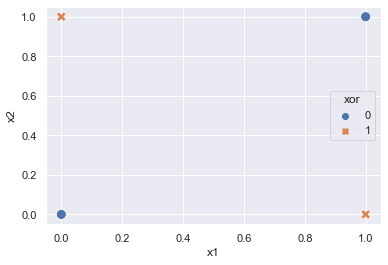

In [2]:
#plot xor data
import seaborn as sns
sns.set()
data = pd.DataFrame(train_x, columns=['x1', 'x2'])
data['xor'] = train_y
sns.scatterplot(data=data, x='x1', y='x2', style='xor', hue='xor', s=100)

In [3]:
#Create an activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

#calculating derivative of sigmoid function
def sigmoid_derivative(sigmoid_result):
    return sigmoid_result * (1 - sigmoid_result)

#error calculation
def error(target, prediction):
    return .5 * (target - prediction)**2

#Derivative of error calculations
def error_derivative(target, prediction):
    return - target + prediction



In [4]:
#set number of nurons and initialize weight and bias

n_nuron_input=2
n_nuron_hidden=2
n_nuron_output=1

w_hidden = np.random.random(size=(n_nuron_input, n_nuron_hidden))
print("w_hidden",w_hidden)
b_hidden = np.random.random(size=(1, n_nuron_hidden))
print("b_hidden",b_hidden)
w_output = np.random.random(size=(n_nuron_hidden, n_nuron_output))
print("w_output",w_output)
b_output = np.random.random(size=(1, n_nuron_output))
print("b_output",b_output)

w_hidden [[0.35193007 0.70306032]
 [0.69594897 0.39329277]]
b_hidden [[0.66078475 0.27653526]]
w_output [[0.11711366]
 [0.2617724 ]]
b_output [[0.1573279]]


In [6]:
alpha = 0.02
errors = []
params = []
grads = []
while True:
    # forward prop
    y_hidden = sigmoid(np.dot(train_x, w_hidden) + b_hidden)
    y_output = sigmoid(np.dot(y_hidden, w_output) + b_output)

    # calculate mean error of all the errors for this epoch
    e = error(train_y, y_output).mean()
    if e < 1e-4:
        break

    # back prop
    grad_output = error_derivative(train_y, y_output) * sigmoid_derivative(y_output)
    grad_hidden = grad_output.dot(w_output.T) * sigmoid_derivative(y_hidden)

    # update parameters
    w_output -= alpha * y_hidden.T.dot(grad_output)
    w_hidden -= alpha * train_x.T.dot(grad_hidden)

    b_output -= alpha * np.sum(grad_output)
    b_hidden -= alpha * np.sum(grad_hidden)

    # record intermediate results
    errors.append(e)
    grads.append(np.concatenate((grad_output.reshap, grad_hidden.ravel())))
    params.append(np.concatenate((w_output.ravel(), b_output.ravel(),
                                  w_hidden.ravel(), b_hidden.ravel())))

#print("Errors :\n",errors)
#print("Gradients :\n",grads)
#print("Parameters :\n",params)

In [7]:
def predict(x):
    y_hidden = sigmoid(np.dot(x, w_hidden) + b_hidden)
    return sigmoid(np.dot(y_hidden, w_output) + b_output)
predict(train_x)

array([[0.01506288],
       [0.98652634],
       [0.98652527],
       [0.01449142]])